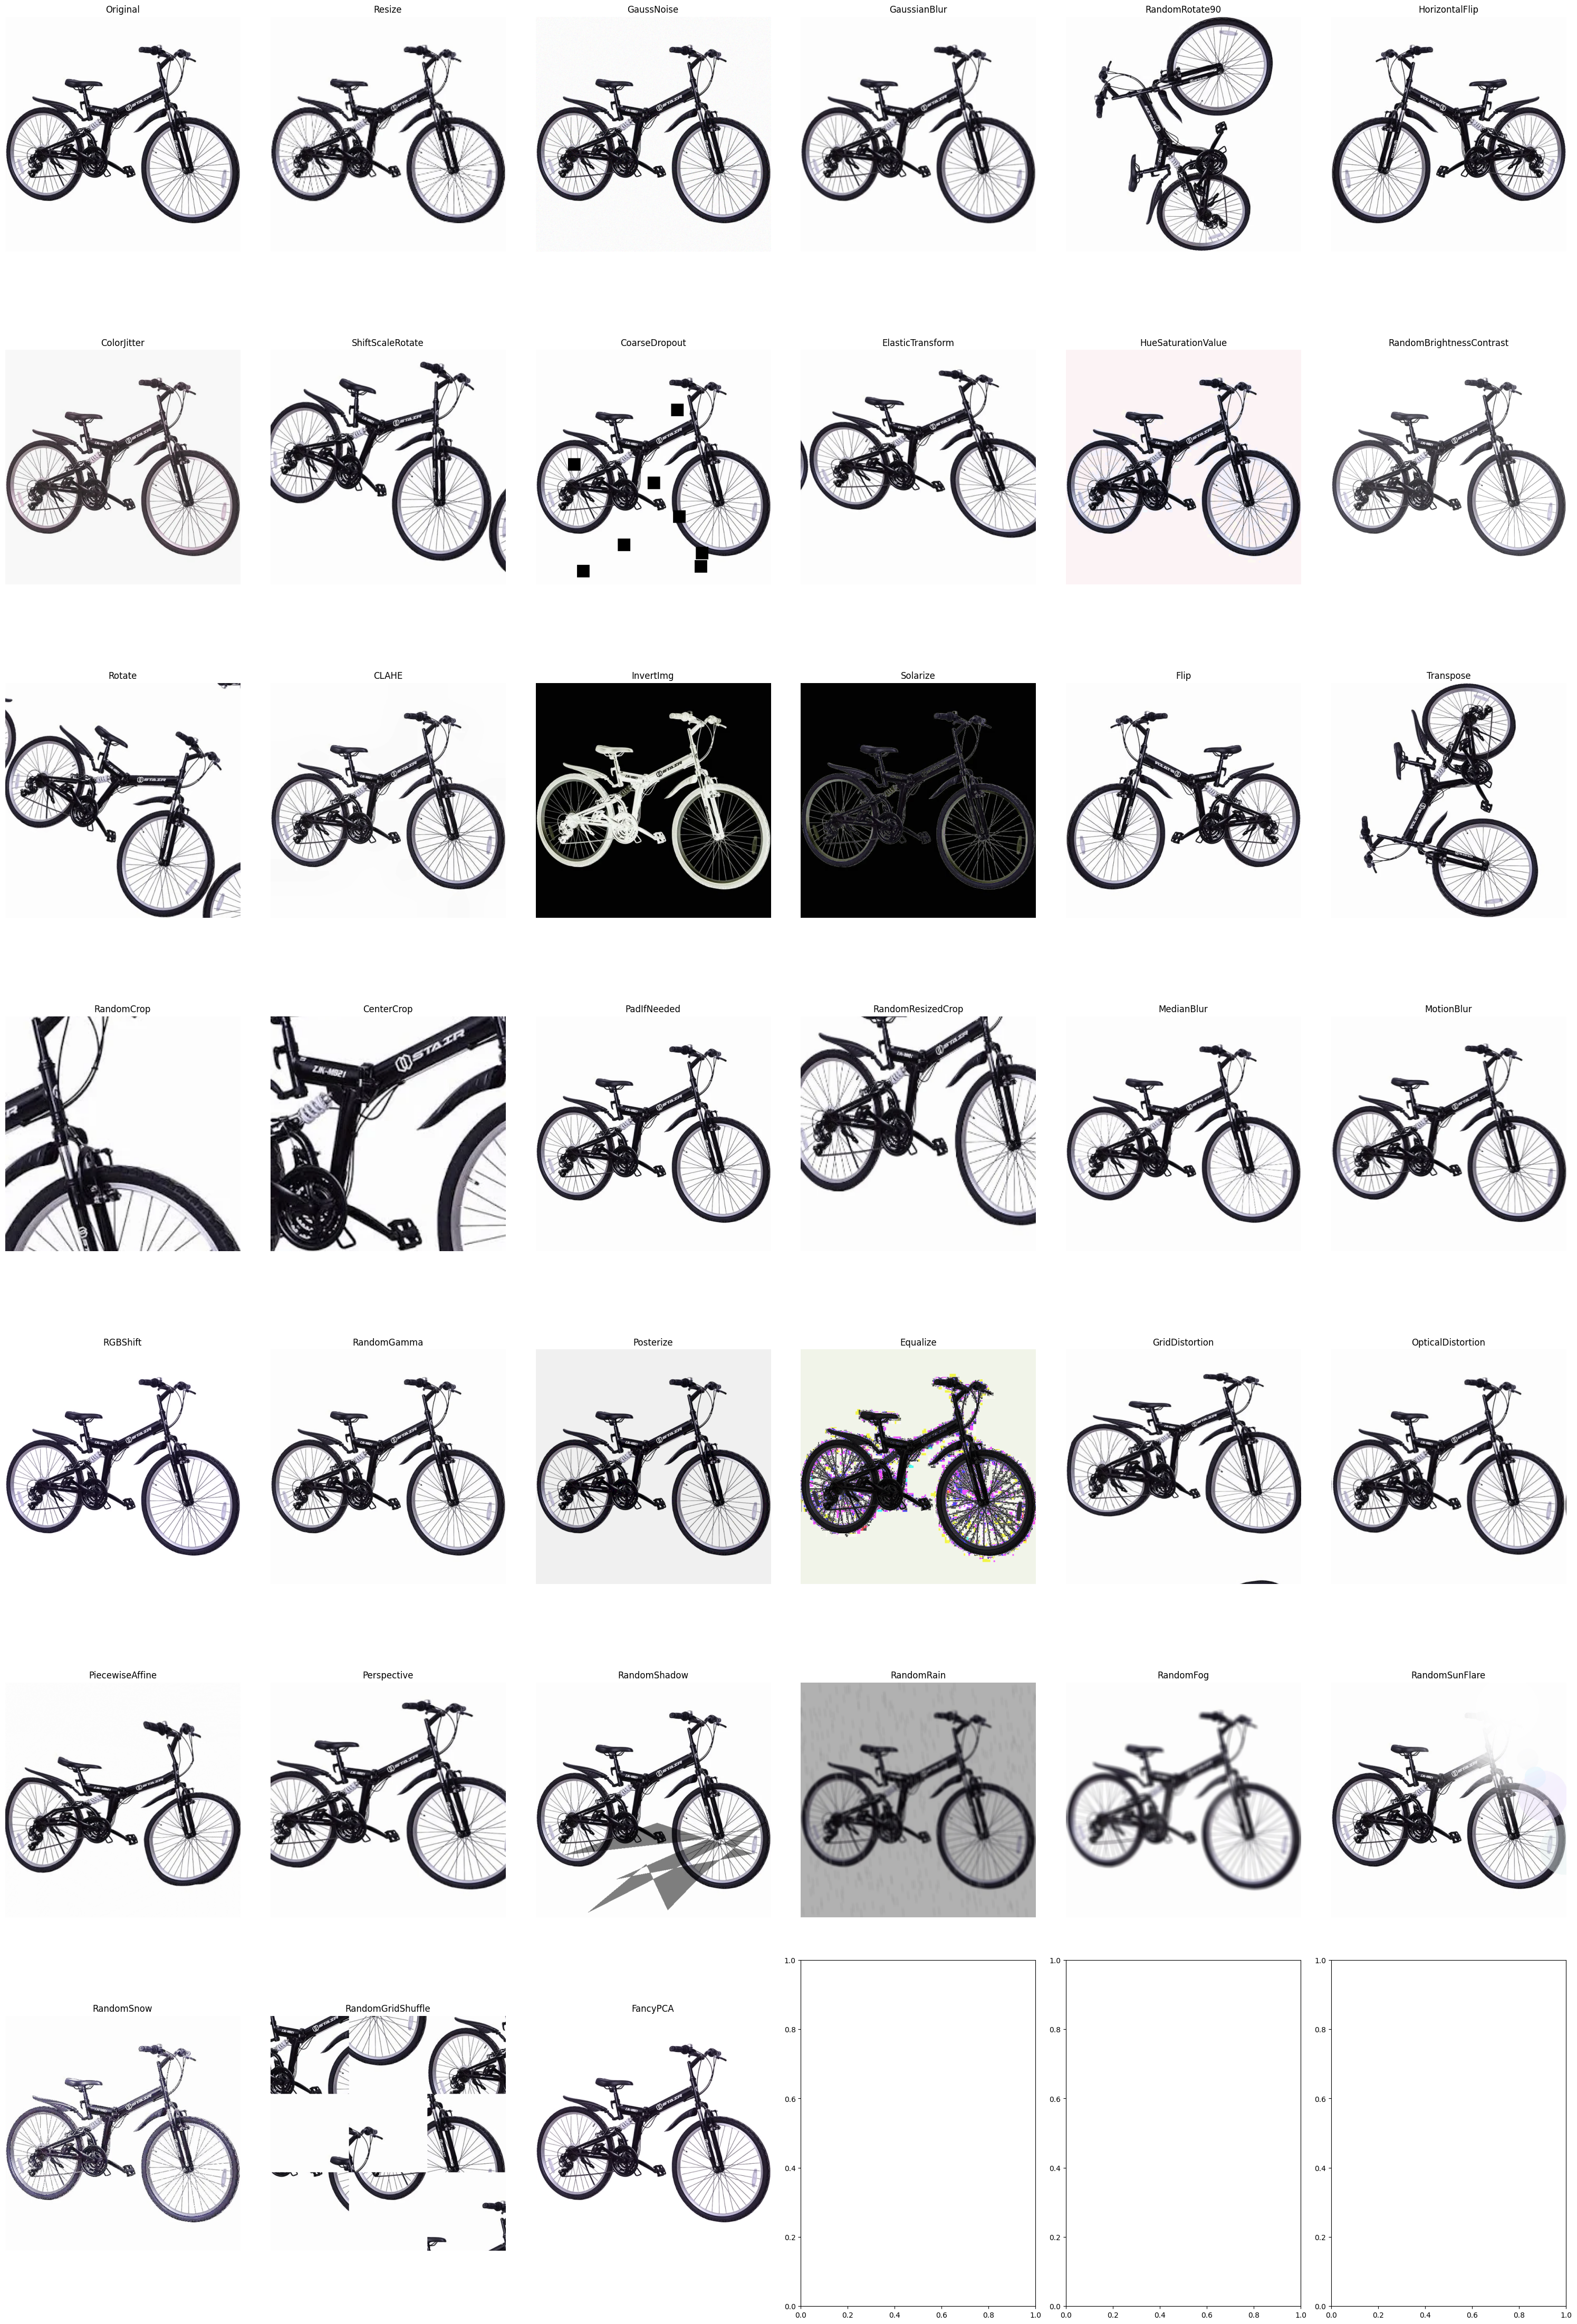

In [13]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from albumentations import (
    Compose, Resize, OneOf, GaussNoise, GaussianBlur, RandomRotate90,
    HorizontalFlip, ColorJitter, ShiftScaleRotate, CoarseDropout,
    ElasticTransform, HueSaturationValue, RandomBrightnessContrast,
    Rotate, Normalize, CLAHE, InvertImg, Solarize, Flip, Transpose,
    RandomCrop, CenterCrop, PadIfNeeded, RandomResizedCrop, MedianBlur,
    MotionBlur, RGBShift, RandomGamma, Posterize, Equalize, GridDistortion,
    OpticalDistortion, PiecewiseAffine, Perspective, RandomShadow,
    RandomRain, RandomFog, RandomSunFlare, RandomSnow, RandomGridShuffle,
    FancyPCA
)
from albumentations.pytorch import ToTensorV2

# Load the image
img_path = 'shopping.webp'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the transformation
transformations = {
    "Original": None,
    "Resize": Resize(height=256, width=256),
    "GaussNoise": GaussNoise(var_limit=(10.0, 1000.0), p=1),
    "GaussianBlur": GaussianBlur(blur_limit=(3, 5), p=1),
    "RandomRotate90": RandomRotate90(p=1),
    "HorizontalFlip": HorizontalFlip(p=1),
    "ColorJitter": ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, p=1),
    "ShiftScaleRotate": ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=1),
    "CoarseDropout": CoarseDropout(max_holes=8, max_height=32, max_width=32, p=1),
    "ElasticTransform": ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1),
    "HueSaturationValue": HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=1),
    "RandomBrightnessContrast": RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1),
    "Rotate": Rotate(limit=30, p=1),
    "CLAHE": CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), p=1),
    "InvertImg": InvertImg(p=1),
    "Solarize": Solarize(threshold=128, p=1),
    "Flip": Flip(p=1),
    "Transpose": Transpose(p=1),
    "RandomCrop": RandomCrop(height=224, width=224, p=1),
    "CenterCrop": CenterCrop(height=224, width=224, p=1),
    "PadIfNeeded": PadIfNeeded(min_height=300, min_width=300, p=1),
    "RandomResizedCrop": RandomResizedCrop(height=224, width=224, p=1),
    "MedianBlur": MedianBlur(blur_limit=5, p=1),
    "MotionBlur": MotionBlur(blur_limit=5, p=1),
    "RGBShift": RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1),
    "RandomGamma": RandomGamma(gamma_limit=(80, 120), p=1),
    "Posterize": Posterize(num_bits=4, p=1),
    "Equalize": Equalize(p=1),
    "GridDistortion": GridDistortion(p=1),
    "OpticalDistortion": OpticalDistortion(p=1),
    "PiecewiseAffine": PiecewiseAffine(p=1),
    "Perspective": Perspective(p=1),
    "RandomShadow": RandomShadow(p=1),
    "RandomRain": RandomRain(p=1),
    "RandomFog": RandomFog(p=1),
    "RandomSunFlare": RandomSunFlare(p=1),
    "RandomSnow": RandomSnow(p=1),
    "RandomGridShuffle": RandomGridShuffle(p=1),
    "FancyPCA": FancyPCA(p=1),
}

# Apply and visualize the transformations
fig, axs = plt.subplots(7, 6, figsize=(30, 45))
axs = axs.flatten()

for ax, (name, transform) in zip(axs, transformations.items()):
    if transform is not None:
        augmented = transform(image=image)["image"]
    else:
        augmented = image

    if name == "Normalize and ToTensorV2":
        augmented = (augmented.permute(1, 2, 0) * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])).numpy()

    ax.imshow(augmented.astype(np.uint8))
    ax.set_title(name)
    ax.axis('off')

plt.tight_layout()
plt.show()
